In [28]:
from src.card import Card
from src.deck import Deck
from src.lookup import LookupTable
from src.evaluator import Evaluator
from src.player import Player

import operator
import random

import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### **3 Player Game with one of each type**

In [91]:
# Create 3 players, evaluator, and tracker
hawk_player = Player('hawk')
dove_player = Player('dove')
random_player = Player('random')

# Create an evaluator
evaluator = Evaluator()

# Create wins tracker
tracker = {'hawk': 0, 'dove': 0, 'random': 0}

# Create banks
banks = {'hawk': 500, 'dove': 500, 'random': 500}

# Banks over time
hawk_money = []
dove_money = []
random_money = []

In [92]:
# Simulate poker hands
for i in range(10000):
    
    # Create a new deck and board (flop only)
    deck = Deck()
    board = deck.draw(3)

    # Player hands
    hawk_player_hand = deck.draw(2)
    dove_player_hand = deck.draw(2)
    random_player_hand = deck.draw(2)

    # Score the hand
    hawk_score = evaluator.evaluate(board, hawk_player_hand)
    dove_score = evaluator.evaluate(board, dove_player_hand)
    random_score = evaluator.evaluate(board, random_player_hand)

    hawk_class = evaluator.get_rank_class(hawk_score)
    dove_class = evaluator.get_rank_class(dove_score)
    random_class = evaluator.get_rank_class(random_score)

    # Start making moves ('check' is the default)
    hawk_move = 'check'
    dove_move = 'check'
    random_move = 'check'
    
    # Move tracker
    d = {}
    d['hawk'] = hawk_player.make_move(hawk_score)
    d['dove'] = dove_player.make_move(dove_score)
    d['random'] = random_player.make_move(random_score)

    # Second moves
    hawk_second_move = hawk_player.make_second_move(hawk_score, 'hawk', d)
    dove_second_move = dove_player.make_second_move(dove_score, 'dove', d)
    random_second_move = random_player.make_second_move(random_score, 'random', d)

    # Determine winner
    scores = {'hawk': hawk_score, 'dove': dove_score, 'random': random_score}
    
    if hawk_second_move == 'fold':
        scores['hawk'] = 10000
    if dove_second_move == 'fold':
        scores['dove'] = 10000
    if random_second_move == 'fold':
        scores['random'] = 10000

    winner = min(scores.items(), key=operator.itemgetter(1))[0]
    
    # Update tracker
    tracker[winner] += 1
    for k, v in banks.items():
        if k != winner and d[k] == 'raise':
            banks[k] -= 2
        elif k != winner and d[k] != 'raise':
            banks[k] -= 1
        elif k == winner and d[k] == 'raise':
            banks[k] += 3
        else:
            banks[k] += 2
            
    # Update banks
    hawk_money.append(banks['hawk'])
    dove_money.append(banks['dove'])
    random_money.append(banks['random'])

In [93]:
print(tracker)
print(banks)

{'hawk': 3624, 'dove': 2855, 'random': 3521}
{'hawk': 2141, 'dove': -555, 'random': -253}


In [94]:
print(hawk_money[:10])
print(dove_money[:10])
print(random_money[:10])

[503, 502, 501, 500, 503, 502, 500, 499, 497, 495]
[499, 498, 497, 499, 498, 497, 499, 498, 501, 503]
[499, 501, 504, 503, 502, 505, 503, 505, 504, 502]


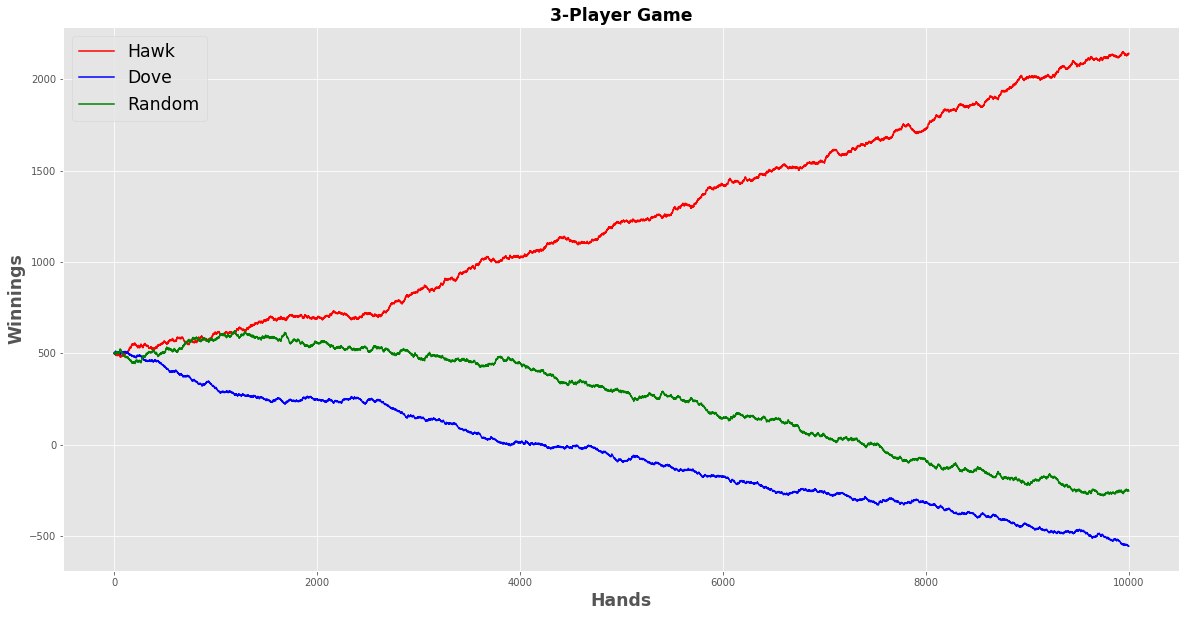

In [95]:
x = list(range(10000))
y_hawk = hawk_money
y_dove = dove_money
y_random = random_money

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x, y_hawk, color='red', label='Hawk')
plt.plot(x, y_dove, color='blue', label='Dove')
plt.plot(x, y_random, color='green', label='Random')
plt.xlabel('Hands', fontsize='xx-large', fontweight='bold')
plt.ylabel('Winnings', fontsize='xx-large', fontweight='bold')
plt.legend(fontsize='xx-large')
plt.title('3-Player Game', fontsize='xx-large', fontweight='bold')
# plt.savefig('3_players')

#### **4 Player game with two randoms**

In [96]:
# Create 3 players, evaluator, and tracker
hawk_player = Player('hawk')
dove_player = Player('dove')
random_player = Player('random')
random_player2 = Player('random')

# Create an evaluator
evaluator = Evaluator()

# Create wins tracker
tracker = {'hawk': 0, 'dove': 0, 'random': 0, 'random2': 0}

# Create banks
banks = {'hawk': 500, 'dove': 500, 'random': 500, 'random2': 500}

# Banks over time
hawk_money = []
dove_money = []
random_money = []
random_money2 = []

In [97]:
# Simulate poker hands
for i in range(10000):
    
    # Create a new deck and board (flop only)
    deck = Deck()
    board = deck.draw(3)

    # Player hands
    hawk_player_hand = deck.draw(2)
    dove_player_hand = deck.draw(2)
    random_player_hand = deck.draw(2)
    random_player_hand2 = deck.draw(2)

    # Score the hand
    hawk_score = evaluator.evaluate(board, hawk_player_hand)
    dove_score = evaluator.evaluate(board, dove_player_hand)
    random_score = evaluator.evaluate(board, random_player_hand)
    random_score2 = evaluator.evaluate(board, random_player_hand2)

    hawk_class = evaluator.get_rank_class(hawk_score)
    dove_class = evaluator.get_rank_class(dove_score)
    random_class = evaluator.get_rank_class(random_score)
    random_class2 = evaluator.get_rank_class(random_score2)

    # Start making moves ('check' is the default)
    hawk_move = 'check'
    dove_move = 'check'
    random_move = 'check'
    random_move2 = 'check'
    
    # Move tracker
    d = {}
    d['hawk'] = hawk_player.make_move(hawk_score)
    d['dove'] = dove_player.make_move(dove_score)
    d['random'] = random_player.make_move(random_score)
    d['random2'] = random_player2.make_move(random_score2)

    # Second moves
    hawk_second_move = hawk_player.make_second_move(hawk_score, 'hawk', d)
    dove_second_move = dove_player.make_second_move(dove_score, 'dove', d)
    random_second_move = random_player.make_second_move(random_score, 'random', d)
    random_second_move2 = random_player2.make_second_move(random_score2, 'random', d)

    # Determine winner
    scores = {'hawk': hawk_score, 'dove': dove_score, 'random': random_score, 'random2': random_score2}
    
    if hawk_second_move == 'fold':
        scores['hawk'] = 10000
    if dove_second_move == 'fold':
        scores['dove'] = 10000
    if random_second_move == 'fold':
        scores['random'] = 10000
    if random_second_move2 == 'fold':
        scores['random2'] = 10000

    winner = min(scores.items(), key=operator.itemgetter(1))[0]
    
    # Update tracker
    tracker[winner] += 1
    for k, v in banks.items():
        if k != winner and d[k] == 'raise':
            banks[k] -= 2
        elif k != winner and d[k] != 'raise':
            banks[k] -= 1
        elif k == winner and d[k] == 'raise':
            banks[k] += 3
        else:
            banks[k] += 2
            
    # Update banks
    hawk_money.append(banks['hawk'])
    dove_money.append(banks['dove'])
    random_money.append(banks['random'])
    random_money2.append(banks['random2'])

In [98]:
print(tracker)
print(banks)

{'hawk': 2581, 'dove': 2229, 'random': 2605, 'random2': 2585}
{'hawk': -2033, 'dove': -2439, 'random': -3983, 'random2': -4125}


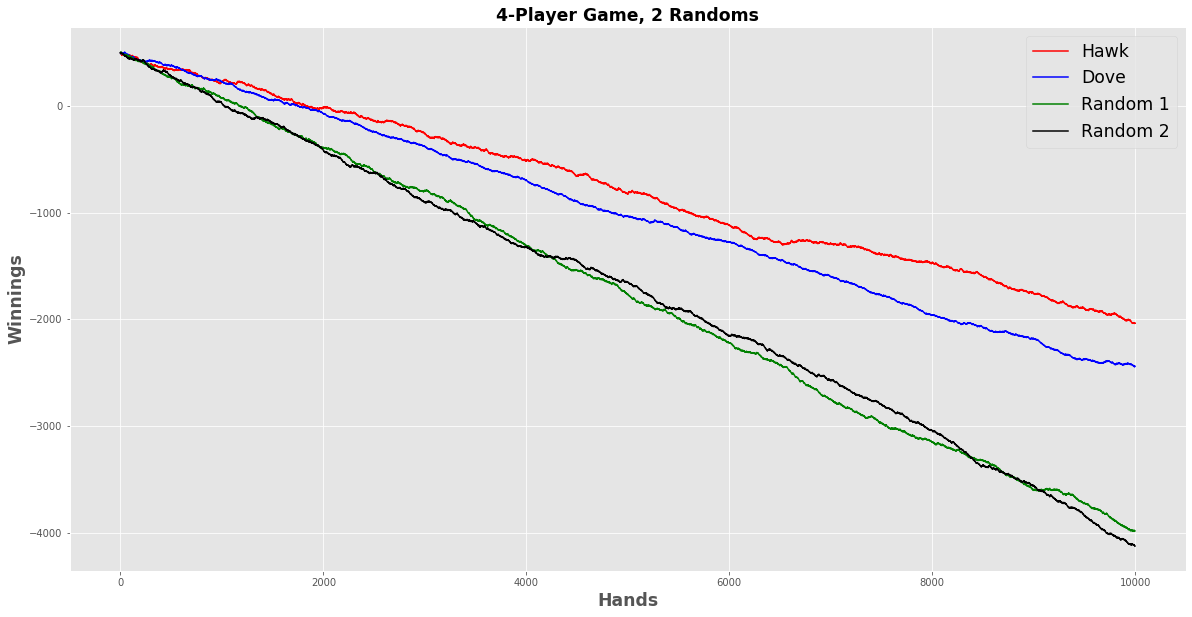

In [99]:
x = list(range(10000))
y_hawk = hawk_money
y_dove = dove_money
y_random = random_money
y_random2 = random_money2

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x, y_hawk, color='red', label='Hawk')
plt.plot(x, y_dove, color='blue', label='Dove')
plt.plot(x, y_random, color='green', label='Random 1')
plt.plot(x, y_random2, color='black', label='Random 2')
plt.xlabel('Hands', fontsize='xx-large', fontweight='bold')
plt.ylabel('Winnings', fontsize='xx-large', fontweight='bold')
plt.legend(fontsize='xx-large')
plt.title('4-Player Game, 2 Randoms', fontsize='xx-large', fontweight='bold')
# plt.savefig('2_randoms')

#### **4 Players with two doves**

In [100]:
# Create 3 players, evaluator, and tracker
hawk_player = Player('hawk')
dove_player = Player('dove')
dove_player2 = Player('dove')
random_player = Player('random')

# Create an evaluator
evaluator = Evaluator()

# Create wins tracker
tracker = {'hawk': 0, 'dove': 0, 'random': 0, 'dove2': 0}

# Create banks
banks = {'hawk': 500, 'dove': 500, 'random': 500, 'dove2': 500}

# Banks over time
hawk_money = []
dove_money = []
random_money = []
dove_money2 = []

In [101]:
# Simulate poker hands
for i in range(10000):
    
    # Create a new deck and board (flop only)
    deck = Deck()
    board = deck.draw(3)

    # Player hands
    hawk_player_hand = deck.draw(2)
    dove_player_hand = deck.draw(2)
    random_player_hand = deck.draw(2)
    dove_player_hand2 = deck.draw(2)

    # Score the hand
    hawk_score = evaluator.evaluate(board, hawk_player_hand)
    dove_score = evaluator.evaluate(board, dove_player_hand)
    random_score = evaluator.evaluate(board, random_player_hand)
    dove_score2 = evaluator.evaluate(board, dove_player_hand2)

    hawk_class = evaluator.get_rank_class(hawk_score)
    dove_class = evaluator.get_rank_class(dove_score)
    random_class = evaluator.get_rank_class(random_score)
    dove_class2 = evaluator.get_rank_class(dove_score2)

    # Start making moves ('check' is the default)
    hawk_move = 'check'
    dove_move = 'check'
    random_move = 'check'
    dove_move2 = 'check'
    
    # Move tracker
    d = {}
    d['hawk'] = hawk_player.make_move(hawk_score)
    d['dove'] = dove_player.make_move(dove_score)
    d['random'] = random_player.make_move(random_score)
    d['dove2'] = dove_player2.make_move(dove_score2)

    # Second moves
    hawk_second_move = hawk_player.make_second_move(hawk_score, 'hawk', d)
    dove_second_move = dove_player.make_second_move(dove_score, 'dove', d)
    random_second_move = random_player.make_second_move(random_score, 'random', d)
    dove_second_move2 = dove_player2.make_second_move(dove_score2, 'random', d)

    # Determine winner
    scores = {'hawk': hawk_score, 'dove': dove_score, 'random': random_score, 'dove2': dove_score2}
    
    if hawk_second_move == 'fold':
        scores['hawk'] = 10000
    if dove_second_move == 'fold':
        scores['dove'] = 10000
    if random_second_move == 'fold':
        scores['random'] = 10000
    if dove_second_move2 == 'fold':
        scores['dove2'] = 10000

    winner = min(scores.items(), key=operator.itemgetter(1))[0]
    
    # Update tracker
    tracker[winner] += 1
    for k, v in banks.items():
        if k != winner and d[k] == 'raise':
            banks[k] -= 2
        elif k != winner and d[k] != 'raise':
            banks[k] -= 1
        elif k == winner and d[k] == 'raise':
            banks[k] += 3
        else:
            banks[k] += 2
            
    # Update banks
    hawk_money.append(banks['hawk'])
    dove_money.append(banks['dove'])
    random_money.append(banks['random'])
    dove_money2.append(banks['dove2'])

In [102]:
print(tracker)
print(banks)

{'hawk': 2538, 'dove': 2393, 'random': 2582, 'dove2': 2487}
{'hawk': -2170, 'dove': -1950, 'random': -4102, 'dove2': -1655}


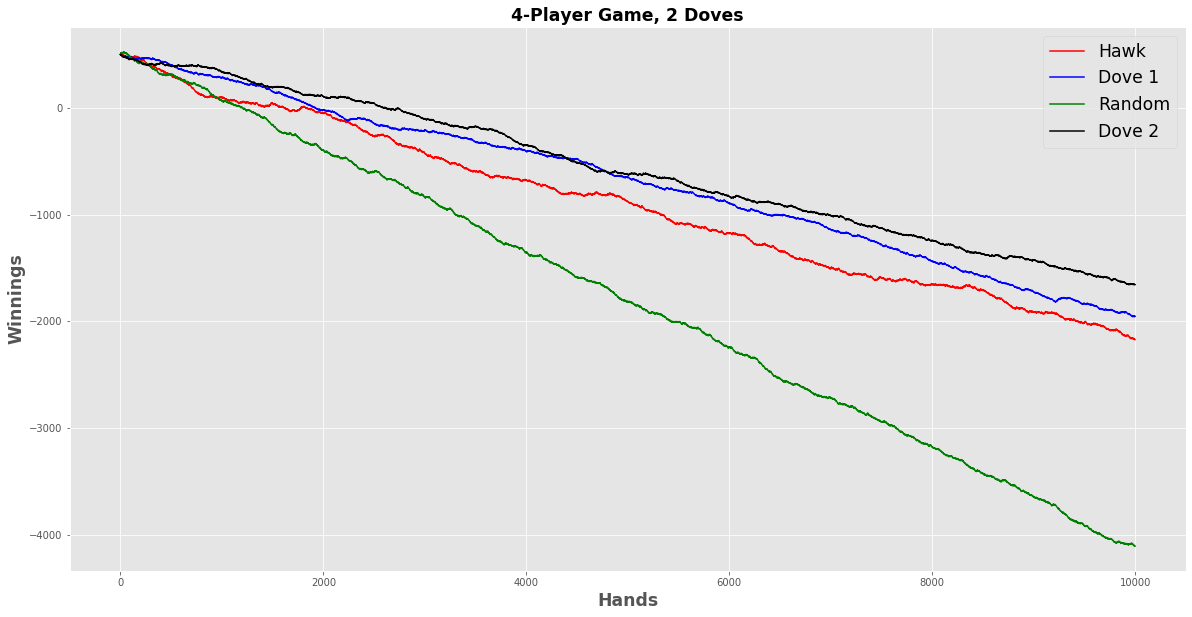

In [103]:
x = list(range(10000))
y_hawk = hawk_money
y_dove = dove_money
y_random = random_money
y_dove2 = dove_money2

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x, y_hawk, color='red', label='Hawk')
plt.plot(x, y_dove, color='blue', label='Dove 1')
plt.plot(x, y_random, color='green', label='Random')
plt.plot(x, y_dove2, color='black', label='Dove 2')
plt.xlabel('Hands', fontsize='xx-large', fontweight='bold')
plt.ylabel('Winnings', fontsize='xx-large', fontweight='bold')
plt.legend(fontsize='xx-large')
plt.title('4-Player Game, 2 Doves', fontsize='xx-large', fontweight='bold')
# plt.savefig('2_doves')

#### **4 players with two hawks**

In [104]:
# Create 3 players, evaluator, and tracker
hawk_player = Player('hawk')
hawk_player2 = Player('hawk')
dove_player = Player('dove')
random_player = Player('random')

# Create an evaluator
evaluator = Evaluator()

# Create wins tracker
tracker = {'hawk': 0, 'dove': 0, 'random': 0, 'hawk2': 0}

# Create banks
banks = {'hawk': 500, 'dove': 500, 'random': 500, 'hawk2': 500}

# Banks over time
hawk_money = []
dove_money = []
random_money = []
hawk_money2 = []

In [105]:
# Simulate poker hands
for i in range(10000):
    
    # Create a new deck and board (flop only)
    deck = Deck()
    board = deck.draw(3)

    # Player hands
    hawk_player_hand = deck.draw(2)
    dove_player_hand = deck.draw(2)
    random_player_hand = deck.draw(2)
    hawk_player_hand2 = deck.draw(2)

    # Score the hand
    hawk_score = evaluator.evaluate(board, hawk_player_hand)
    dove_score = evaluator.evaluate(board, dove_player_hand)
    random_score = evaluator.evaluate(board, random_player_hand)
    hawk_score2 = evaluator.evaluate(board, hawk_player_hand2)

    hawk_class = evaluator.get_rank_class(hawk_score)
    dove_class = evaluator.get_rank_class(dove_score)
    random_class = evaluator.get_rank_class(random_score)
    hawk_class2 = evaluator.get_rank_class(hawk_score2)

    # Start making moves ('check' is the default)
    hawk_move = 'check'
    dove_move = 'check'
    random_move = 'check'
    hawk_move2 = 'check'
    
    # Move tracker
    d = {}
    d['hawk'] = hawk_player.make_move(hawk_score)
    d['dove'] = dove_player.make_move(dove_score)
    d['random'] = random_player.make_move(random_score)
    d['hawk2'] = hawk_player2.make_move(hawk_score2)

    # Second moves
    hawk_second_move = hawk_player.make_second_move(hawk_score, 'hawk', d)
    dove_second_move = dove_player.make_second_move(dove_score, 'dove', d)
    random_second_move = random_player.make_second_move(random_score, 'random', d)
    hawk_second_move2 = hawk_player2.make_second_move(hawk_score2, 'random', d)

    # Determine winner
    scores = {'hawk': hawk_score, 'dove': dove_score, 'random': random_score, 'hawk2': hawk_score2}
    
    if hawk_second_move == 'fold':
        scores['hawk'] = 10000
    if dove_second_move == 'fold':
        scores['dove'] = 10000
    if random_second_move == 'fold':
        scores['random'] = 10000
    if hawk_second_move2 == 'fold':
        scores['hawk2'] = 10000

    winner = min(scores.items(), key=operator.itemgetter(1))[0]
    
    # Update tracker
    tracker[winner] += 1
    for k, v in banks.items():
        if k != winner and d[k] == 'raise':
            banks[k] -= 2
        elif k != winner and d[k] != 'raise':
            banks[k] -= 1
        elif k == winner and d[k] == 'raise':
            banks[k] += 3
        else:
            banks[k] += 2
            
    # Update banks
    hawk_money.append(banks['hawk'])
    dove_money.append(banks['dove'])
    random_money.append(banks['random'])
    hawk_money2.append(banks['hawk2'])

In [106]:
print(tracker)
print(banks)

{'hawk': 2660, 'dove': 2328, 'random': 2487, 'hawk2': 2525}
{'hawk': -1779, 'dove': -2170, 'random': -4497, 'hawk2': -2257}


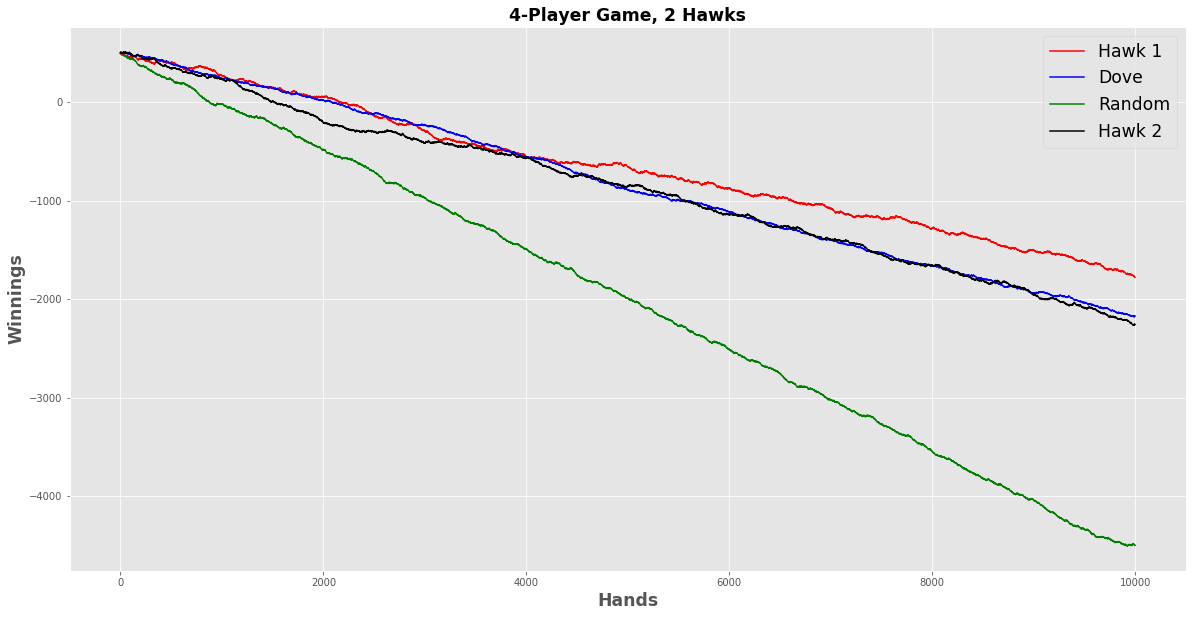

In [107]:
x = list(range(10000))
y_hawk = hawk_money
y_dove = dove_money
y_random = random_money
y_hawk2 = hawk_money2

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(x, y_hawk, color='red', label='Hawk 1')
plt.plot(x, y_dove, color='blue', label='Dove')
plt.plot(x, y_random, color='green', label='Random')
plt.plot(x, y_hawk2, color='black', label='Hawk 2')
plt.xlabel('Hands', fontsize='xx-large', fontweight='bold')
plt.ylabel('Winnings', fontsize='xx-large', fontweight='bold')
plt.legend(fontsize='xx-large')
plt.title('4-Player Game, 2 Hawks', fontsize='xx-large', fontweight='bold')
# plt.savefig('2_hawks')